# 边缘检测-图像差分操作

对于原函数$f(u)$，差分运算是计算$f(u)$映射到$f(u+a) - f(u+b)$的值，差分运算分为前向差分和逆向差分，一阶前向差分是指$\nabla f = f(u+1) - f(u)$，一阶逆向差分是指$\nabla f = f(u) - f(u-1)$。二维离散图像$f(x,y)$在x方向的一阶差分定义为$\nabla f_x = f(x+1,y) - f(x,y)$，y方向的一阶差分定义为$\nabla f_y = f(x,y+1) - f(x,y)$。差分运算通过求图像灰度变化剧烈处的一阶微分算子的极值来检测奇异点，通过奇异点的值进一步设置阈值就可以得到边缘二值化图像。差分边缘检测中差分的水平方向或垂直方向都与边缘方向正交，因此在实际应用场景中，常常将边缘检测分为水平边缘，垂直边缘及对角边缘，差分边缘检测定义方向模板如下所示：

水平边缘：
[[0,-1,0],
 [0,1,0],
 [0,0,0]]
 
 垂直边缘：
 [[0,0,0],[-1,1,0],[0,0,0]]
 
 对角线边缘：
 [[-1,0,0],[0,1,0],[0,0,0]]

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [20]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [21]:
def diff_operation(src):
    gray = np.float32(src)
    if len(src.shape) > 2:
        gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY).astype(np.float32)
    rows,cols = src.shape
    dst_x = np.zeros_like(gray)
    dst_y = np.zeros_like(gray)
    for i in range(rows - 1):
        for j in range(cols - 1):
            # 计算水平垂直边缘
            dst_x[i,j] = np.abs(gray[i + 1,j] - gray[i,j])
            dst_y[i,j] = np.abs(gray[i,j + 1] - gray[i,j])
    dst = dst_x*0.5 + dst_y * 0.5
    dst = np.clip(dst,0,255)
    return np.uint8(dst_x),np.uint8(dst_y),np.uint8(dst)

In [22]:
dst_x,dst_y,dst = diff_operation(gray)

Text(0.5,1,'diff_x + diff_y')

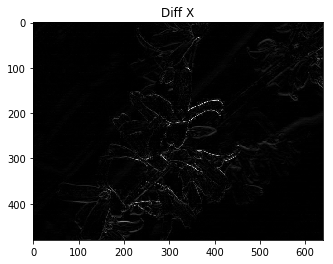

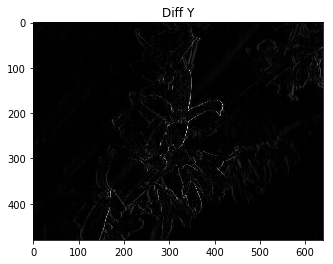

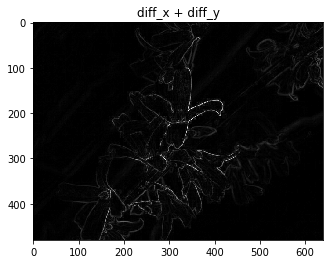

In [23]:
plt.figure()
plt.imshow(dst_x,'gray')
plt.title('Diff X')
plt.figure()
plt.imshow(dst_y,'gray')
plt.title('Diff Y')
plt.figure()
plt.imshow(dst,'gray')
plt.title('diff_x + diff_y')

参考：

[1].OpenCV图像处理编程实例